<center>

# Linear Regression

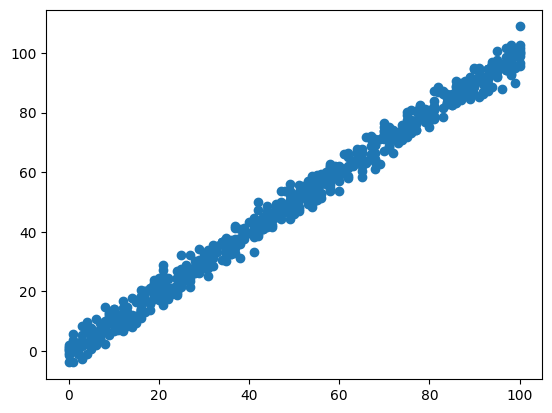






# $y = mx + c$



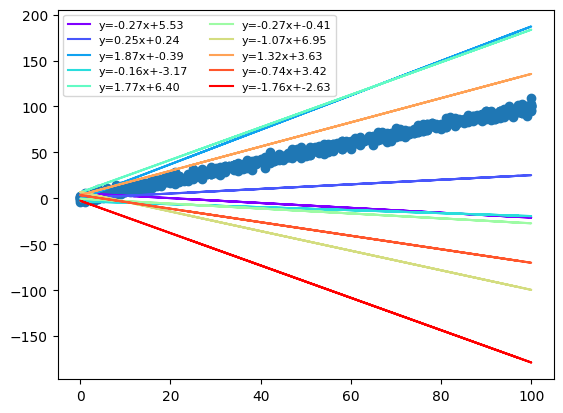



# $J = \sum{(y-\hat{y})}$ ❌
# $J = \sum{(y-\hat{y})^2}$ ❌
# $J = \frac{1}{2m} \sum{(y-\hat{y})^2}$


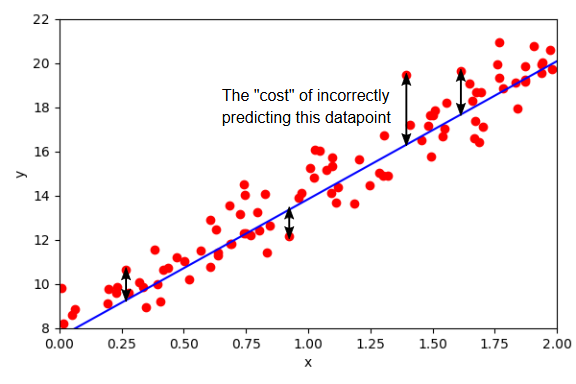



# $m = m - \alpha \frac{\partial J}{\partial m}$
# $c = c - \alpha \frac{\partial J}{\partial c}$


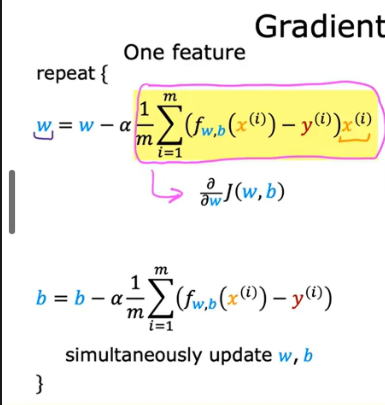


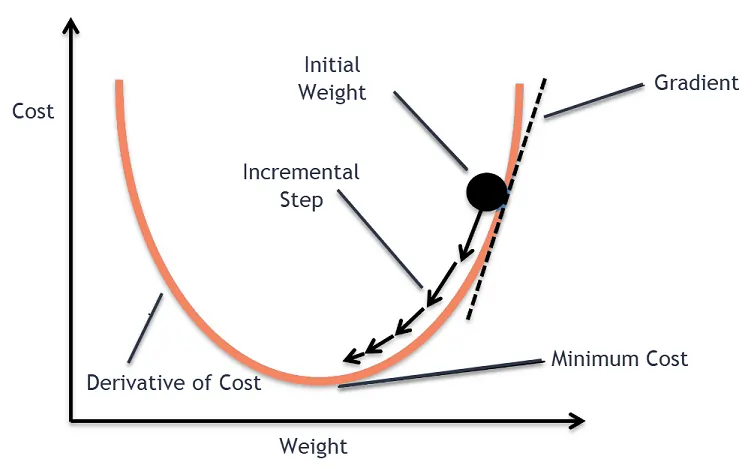

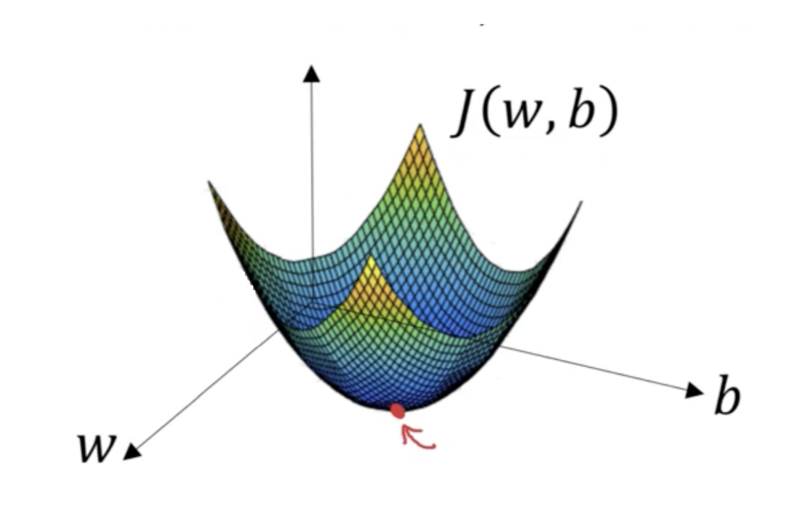


</center>

# Let's implement this

# Imports

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Loading The Dataset

In [33]:
df = pd.read_csv("data_for_lr.csv")
df = df.dropna()

X = df["x"].to_list()
y = df["y"].to_list()


# Let's Plot The Data

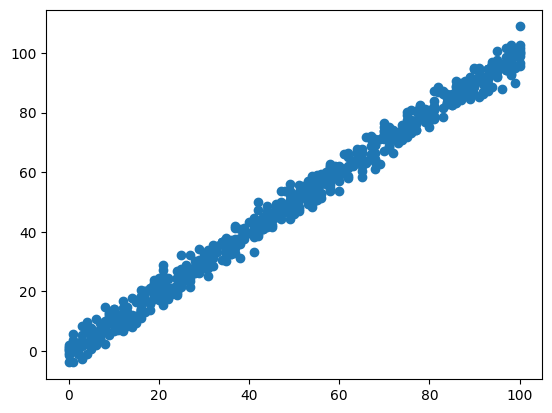

In [34]:
plt.scatter(X,y)

# Required in the next steps

## 1. Linear Regression without vectorization
## 2. Linear Regression with vectorization
## 3. Multiple Linear Regression


In [35]:
class LinearReg:
    def __init__(self):
        self.m=0
        self.c=0
    def compute_grad(self,x,y):
        y_hat = self.predict(x)
        sum_m = 0
        for i in range(len(y)):
            sum_m+= (y_hat[i]-y[i])*x[i]
        sum_c = 0
        for i in range(len(y)):
            sum_c+= (y_hat[i]-y[i])
        return (sum_m/len(y),sum_c/len(y))
    
    def fit(self,x,y,alpha=0.01,noi=1000):
        for i in range(noi):
            dj_dm,dj_dc=self.compute_grad(x,y)
            self.m=self.m-alpha*dj_dm
            self.c=self.c-alpha*dj_dc
        

    def predict(self,x):
        y_hat=[]
        for xi in x:
            y_hat.append(self.m*xi+self.c)
        return y_hat

In [36]:
model = LinearReg()

In [37]:
model.fit(X , y , 0.0001)

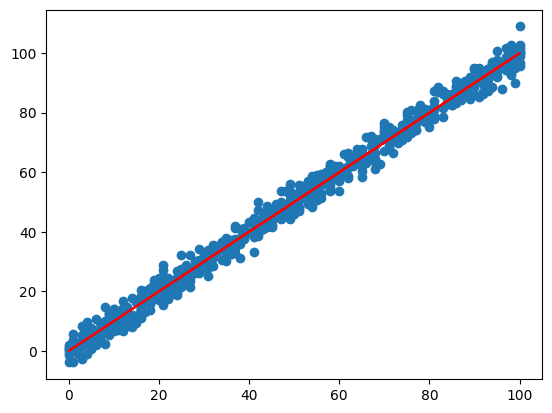

In [38]:
plt.scatter(X,y)
plt.plot(X, model.predict(X) , c="red")

# Why Vectorization is Important

In [39]:
size = 10000000
a = np.arange(size)
b = list(range(size))

sum = 0 
tic = time.time()
for i in b:
    sum+= i
toc = time.time()
print(toc-tic)


tic = time.time()
sum = np.sum(a)
toc = time.time()
print(toc-tic)


0.5815896987915039
0.004882097244262695


# Implementing Linear Regression with vectorization

In [40]:
class LinearReg:
    def __init__(self):
        self.m=0
        self.c=0
    def compute_grad(self,x,y):
        y= np.array(y)
        x = np.array(x)
        y_hat =self.predict(x)
        
        sum_m = np.dot((y_hat- y) , x)
        sum_c = np.sum(y_hat- y)
        return (sum_m/len(y),sum_c/len(y))
    
    def fit(self,x,y,alpha=0.01,noi=1000):
        for i in range(noi):
            dj_dm,dj_dc=self.compute_grad(x,y)
            self.m=self.m-alpha*dj_dm
            self.c=self.c-alpha*dj_dc
        

    def predict(self,x):
        x = np.array(x)
        return self.m * x + self.c

In [41]:
model = LinearReg()
model.fit(X , y , 0.0001)

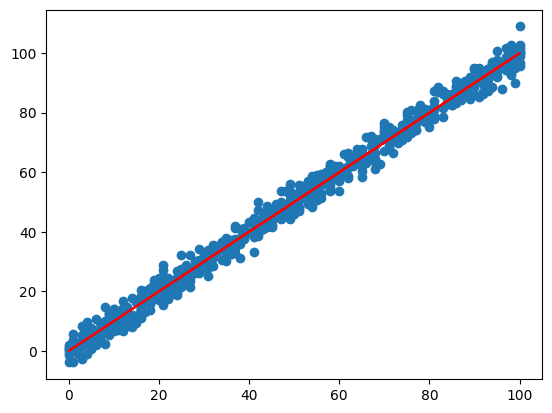

In [42]:
plt.scatter(X,y)
plt.plot(X, model.predict(X) , c="red")

# Implementing Multiple Linear Regression

In [43]:
class LinearReg:
    def fit(self, X, y ,alpha = 0.01 ,  n_iter=100 ):
        X,y, _ = self.reformat(X,y,None)
        
        # initalize weights
        n_features = (X.shape[1]+1)
        self.w = np.zeros(n_features)

        for i in range (n_iter):
            y_hat = self.predict(X)
            self.w -= alpha * self.compute_gradient(X , y , y_hat)
                
    def compute_cost(self,y , y_hat):
        _, y, y_hat = self.reformat(None,y,y_hat)
        
        return sum((y-y_hat)**2)/(2 * len(y))
    
    def compute_gradient(self,X,y,y_hat):
        X , y , y_hat = self.reformat(X,y,y_hat)
        
        m = len(y)
        dj = np.zeros(len(self.w))
        n_features = X.shape[1]
        error = (y_hat-y)

        for i in range(n_features):
            dj[i] = np.dot(error , X[: ,i]) /m
        dj[-1] = np.sum(error)/m
        return dj

    def reformat(self, X = None,y = None,y_hat = None):
        X = np.array(X) 
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        y = np.array(y)
        y_hat = np.array(y_hat)
        return X ,y , y_hat


    def predict(self, X):
        X,*_ = self.reformat(X)
        return np.dot(X , self.w[:-1]) + self.w[-1]


In [44]:
# using X with multiple features
X = np.array([ [1,3],[2,1],[4,5]])
y= np.array([4,3,9])

In [45]:
model = LinearReg()
model.fit(X , y , 0.01 , 1000)

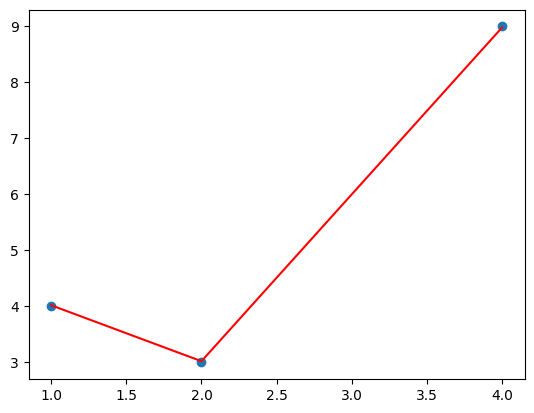

In [46]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0], model.predict(X) , c="red")